# Loading and visualizing the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [25]:
data = loadmat('ex6data1.mat')
X = data['X']
y = data['y']

In [26]:
X.shape

(51, 2)

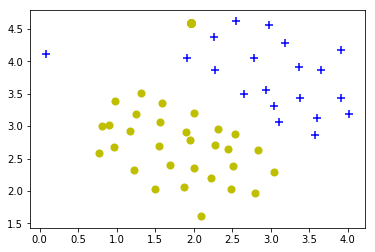

In [27]:
plt.scatter(X[np.where(y==1),0], X[np.where(y==1), 1], marker='+', color='b', s=50) #postive examples
plt.scatter(X[np.where(y==0),0], X[np.where(y==0), 1], marker='o', color='y', s=50) #negative examples

# Using Support Vector Machines

In [28]:
from sklearn.svm import SVC
classifier = SVC(kernel="linear")
classifier.fit(X, np.ravel(y))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

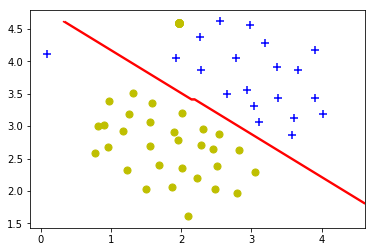

In [32]:
plt.scatter(X[np.where(y==1),0], X[np.where(y==1), 1], marker='+', color='b', s=50) 
plt.scatter(X[np.where(y==0),0], X[np.where(y==0), 1], marker='o', color='y', s=50)

# plotting the decision boundary
X_1,X_2 = np.meshgrid(np.linspace(X[:,0].min(), X[:,1].max(),num=100),np.linspace(X[:,1].min(),X[:,1].max(),num=100))
plt.contour(X_1,X_2,classifier.predict(np.array([X_1.ravel(),X_2.ravel()]).T).reshape(X_1.shape),1,colors="r")


In [33]:
# Test C = 100
classifier2 = SVC(C=100,kernel="linear")
classifier2.fit(X,np.ravel(y))

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

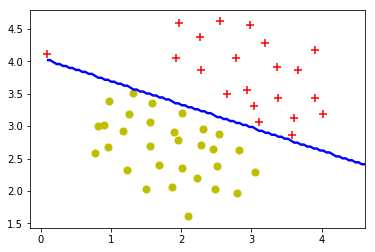

In [34]:
plt.scatter(X[pos[:,0],0],X[pos[:,0],1],c="r",marker="+",s=50)
plt.scatter(X[neg[:,0],0],X[neg[:,0],1],c="y",marker="o",s=50)

# plotting the decision boundary
X_3,X_4 = np.meshgrid(np.linspace(X[:,0].min(),X[:,1].max(),num=100),np.linspace(X[:,1].min(),X[:,1].max(),num=100))
plt.contour(X_3,X_4,classifier2.predict(np.array([X_3.ravel(),X_4.ravel()]).T).reshape(X_3.shape),1,colors="b")


# SVM with Gaussian Kernels

In [35]:
data2 = loadmat('ex6data2.mat')
X2 = data2['X']
y2 = data2['y']

In [36]:
X.shape

(51, 2)

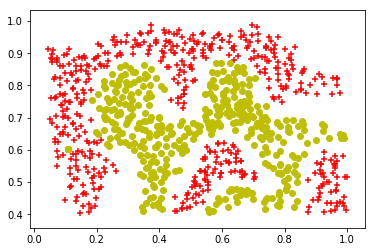

In [38]:
plt.scatter(X2[np.where(y2==1), 0], X2[np.where(y2==1), 1], marker='+', color='r')
plt.scatter(X2[np.where(y2==0), 0], X2[np.where(y2==0), 1], marker='o', color='y')

In [42]:
classifier3 = SVC(kernel="rbf",gamma=30)
classifier3.fit(X2,y2.ravel())

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=30, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

# Visualizing decision boundary

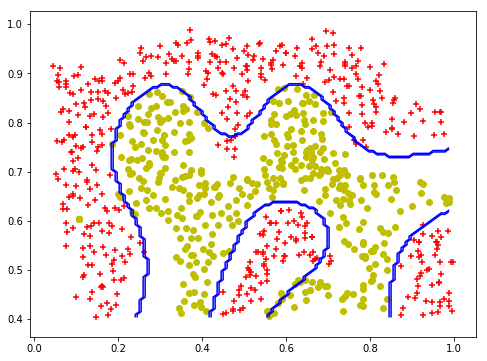

In [44]:
plt.figure(figsize=(8,6))

plt.scatter(X2[np.where(y2==1), 0], X2[np.where(y2==1), 1], marker='+', color='r')
plt.scatter(X2[np.where(y2==0), 0], X2[np.where(y2==0), 1], marker='o', color='y')

# plotting the decision boundary
X_5,X_6 = np.meshgrid(np.linspace(X2[:,0].min(),X2[:,1].max(),num=100),
                      np.linspace(X2[:,1].min(),X2[:,1].max(),num=100))
plt.contour(X_5,X_6,classifier3.predict(np.array([X_5.ravel(),
                                                  X_6.ravel()]).T).reshape(X_5.shape),1,
            colors="b")

# SVM and Gaussian kernels with hyperparameter tuning

In [46]:
data3 = loadmat('ex6data3.mat')
data3.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y', 'yval', 'Xval'])

In [47]:
X3 = data3['X']
y3 = data3['y']
X3val = data3['Xval']
y3val = data3['yval']

# Plotting and visualizing the data

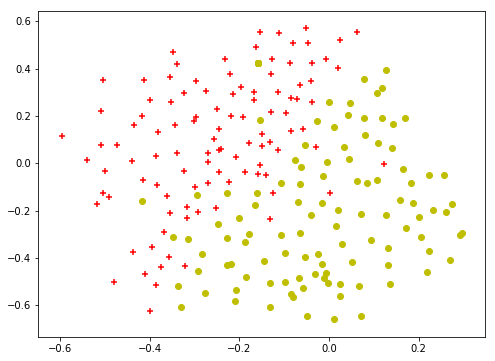

In [49]:
plt.figure(figsize=(8,6))

plt.scatter(X3[np.where(y3==1), 0], X3[np.where(y3==1), 1], marker='+', color='r')
plt.scatter(X3[np.where(y3==0), 0], X3[np.where(y3==0), 1], marker='o', color='y')

# Hyperparameter tuning

In [52]:
def hyperparameters(X, y, Xval, yval, vals):

    """Returns the optimal choice of C and sigma.""" 
    
    acc = 0
    best_c = 0
    best_sigma = 0
    for i in vals:
        C = i
        for j in vals:
            sigma = 1/j
            classifier = SVC(C=C,gamma=sigma)
            classifier.fit(X, y)
            prediction = classifier.predict(Xval)
            score = classifier.score(Xval, yval)
            if score > acc:
                acc = score
                best_c = C
                best_sigma = sigma
    return best_c, best_sigma

In [54]:
vals = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
C, gamma = hyperparameters(X3, y3.ravel(), X3val, y3val.ravel(), vals)
classifier4 = SVC(C=C, gamma=gamma)
classifier4.fit(X3,y3.ravel())

SVC(C=0.3, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=100.0, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

# Visualizing decision boundary

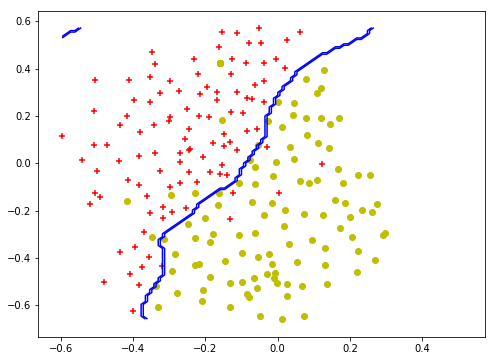

In [55]:
plt.figure(figsize=(8,6))

plt.scatter(X3[np.where(y3==1), 0], X3[np.where(y3==1), 1], marker='+', color='r')
plt.scatter(X3[np.where(y3==0), 0], X3[np.where(y3==0), 1], marker='o', color='y')

# plotting the decision boundary
X_7,X_8 = np.meshgrid(np.linspace(X3[:,0].min(),X3[:,1].max(),num=100),np.linspace(X3[:,1].min(),X3[:,1].max(),num=100))
plt.contour(X_7,X_8,classifier4.predict(np.array([X_7.ravel(),X_8.ravel()]).T).reshape(X_7.shape),1,colors="b")


# Spam Classification Model

Many email services today provide spam filters that are able to classify emails into spam and non-spam email with high accuracy. In this part of the exer- cise, you will use SVMs to build your own spam filter.

# Preprocessing Emails

In [56]:
import re
from nltk.stem import PorterStemmer

file_contents = open("emailSample1.txt","r").read()
vocabList = open("vocab.txt","r").read()

In [65]:
vocabList = vocabList.split("\n")[:-1]

vocabList_d = {}
for ea in vocabList:
    value, key = ea.split("\t")[:]
    vocabList_d[key] = value

In [66]:
file_contents

"> Anyone knows how much it costs to host a web portal ?\n>\nWell, it depends on how many visitors you're expecting.\nThis can be anywhere from less than 10 bucks a month to a couple of $100. \nYou should checkout http://www.rackspace.com/ or perhaps Amazon EC2 \nif youre running something big..\n\nTo unsubscribe yourself from this mailing list, send an email to:\ngroupname-unsubscribe@egroups.com\n\n"

In [69]:
def processEmail(email_contents,vocabList_d):
    """
    Preprocesses the body of an email and returns a list of indices of the words contained in the email. 
    """
    # Lower case
    email_contents = email_contents.lower()
    
    # Handle numbers
    email_contents = re.sub("[0-9]+","number",email_contents)
    
    # Handle URLS
    email_contents = re.sub("[http|https]://[^\s]*","httpaddr",email_contents)
    
    # Handle Email Addresses
    email_contents = re.sub("[^\s]+@[^\s]+","emailaddr",email_contents)
    
    # Handle $ sign
    email_contents = re.sub("[$]+","dollar",email_contents)
    
    # Strip all special characters
    specialChar = ["<","[","^",">","+","?","!","'",".",",",":"]
    for char in specialChar:
        email_contents = email_contents.replace(str(char),"")
    email_contents = email_contents.replace("\n"," ")    
    
    # Stem the word
    ps = PorterStemmer()
    email_contents = [ps.stem(token) for token in email_contents.split(" ")]
    email_contents= " ".join(email_contents)
    
    # Process the email and return word_indices
    
    word_indices=[]
    
    for char in email_contents.split():
        if len(char) >1 and char in vocabList_d:
            word_indices.append(int(vocabList_d[char]))
    
    return word_indices

In [72]:
word_indices = processEmail(file_contents,vocabList_d)
print(word_indices)

[86, 916, 794, 1077, 883, 370, 1699, 790, 1822, 1831, 883, 431, 1171, 794, 1002, 1895, 592, 1676, 238, 162, 89, 688, 945, 1663, 1120, 1062, 1699, 375, 1162, 479, 1893, 1510, 1182, 1237, 810, 1895, 1440, 1547, 181, 1699, 1758, 1896, 688, 1676, 992, 961, 1477, 71, 530, 1699, 531]


# Extracting email features

In [73]:
def emailFeatures(word_indices, vocabList_d):
    """
    Takes in a word_indices vector and  produces a feature vector from the word indices. 
    """
    n = len(vocabList_d)
    
    features = np.zeros((n,1))
    
    for i in word_indices:
        features[i] = 1
        
    return features

In [74]:
features = emailFeatures(word_indices, vocabList_d)
print("Length of feature vector: ",len(features))
print("Number of non-zero entries: ",np.sum(features))

Length of feature vector:  1899
Number of non-zero entries:  43.0


# Training SVM for Spam Classification

In [76]:
data = loadmat('spamTrain.mat')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [77]:
X = data['X']
y = data['y']
print(X.shape)

(4000, 1899)


In [78]:
testdata = loadmat('spamTest.mat')
testdata.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Xtest', 'ytest'])

In [79]:
Xtest = testdata['Xtest']
ytest = testdata['ytest']
print(Xtest.shape)

(1000, 1899)


In [81]:
C = 0.1
spam_svc = SVC(C=0.1, kernel ="linear")
spam_svc.fit(X, y.ravel())
print("Training Accuracy:", (spam_svc.score(X, y.ravel())) * 100, "%")

Training Accuracy: 99.825 %


In [82]:
spam_svc.predict(Xtest)
print("Test Accuracy:",(spam_svc.score(Xtest,ytest.ravel()))*100,"%")

Test Accuracy: 98.9 %


# Top predictive features for spam

In [83]:
weights = spam_svc.coef_[0]
weights_col = np.hstack((np.arange(1,1900).reshape(1899,1), weights.reshape(1899,1)))
df = pd.DataFrame(weights_col)

df.sort_values(by = [1], ascending = False, inplace = True)

predictors = []
idx = []
for i in df[0][:15]:
    for keys, values in vocabList_d.items():
        if str(int(i)) == values:
            predictors.append(keys)
            idx.append(int(values))

In [84]:
print("Top predictors of spam:")

for _ in range(15):
    print(predictors[_],"\t\t",round(df[1][idx[_]-1],6))

Top predictors of spam:
our 		 0.500614
click 		 0.465916
remov 		 0.422869
guarante 		 0.383622
visit 		 0.36771
basenumb 		 0.345064
dollar 		 0.323632
will 		 0.269724
price 		 0.267298
pleas 		 0.261169
most 		 0.257298
nbsp 		 0.253941
lo 		 0.253467
ga 		 0.248297
hour 		 0.246404
